In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
dataset = pd.read_csv('multisat.csv')

In [4]:
dataset

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


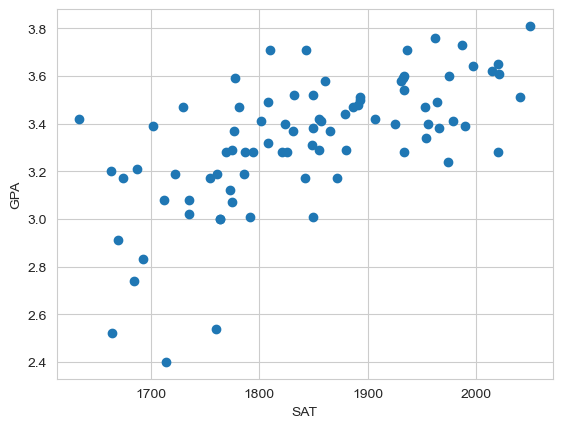

In [5]:
plt.scatter(dataset['SAT'],dataset['GPA'])
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

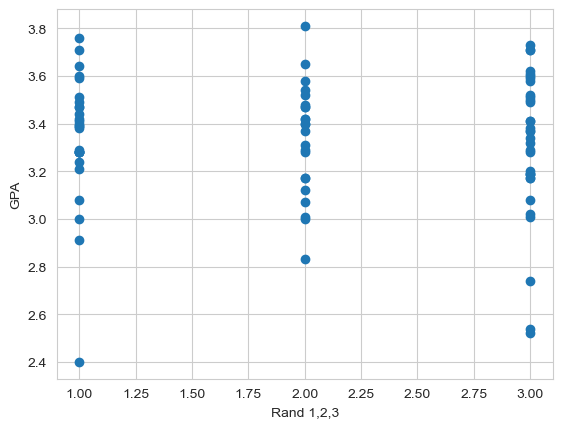

In [6]:
plt.scatter(dataset['Rand 1,2,3'],dataset['GPA'])
plt.xlabel('Rand 1,2,3')
plt.ylabel('GPA')
plt.show()

In [7]:
x1 = dataset[['SAT','Rand 1,2,3']]

In [8]:
x1

,SAT,"Rand 1,2,3"
0,1714,1
1,1664,3
2,1760,3
3,1685,3
4,1693,2
...,...,...
79,1936,3
80,1810,1
81,1987,3
82,1962,1


In [9]:
y = dataset['GPA']

In [10]:
y

0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
      ... 
79    3.71
80    3.71
81    3.73
82    3.76
83    3.81
Name: GPA, Length: 84, dtype: float64

In [11]:
import statsmodels.api as sm

In [12]:
x = sm.add_constant(x1)

In [13]:
x

,const,SAT,"Rand 1,2,3"
0,1.0,1714,1
1,1.0,1664,3
2,1.0,1760,3
3,1.0,1685,3
4,1.0,1693,2
...,...,...,...
79,1.0,1936,3
80,1.0,1810,1
81,1.0,1987,3
82,1.0,1962,1


In [14]:
model = sm.OLS(y,x).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           6.58e-10
Time:                        18:06:45   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""